# Autoencoder
Prepared by: Hieng MAO

In [1]:
import tensorflow as tf
import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np

2025-04-29 06:06:39.601372: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-29 06:06:39.602136: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-29 06:06:39.607476: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-29 06:06:39.622472: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745906799.651668 2604972 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745906799.65

In [2]:
encoding_dim = 32

input_img = keras.Input(shape=(784,))

# Add a dense layer with input the original image pixels and neurons the encoded representation
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# Start with a sequential model
autoencoder = models.Model(inputs=input_img, outputs=decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

encoded_input = keras.Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]

# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

# Compile the model with adadelta
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

E0000 00:00:1745906803.139859 2604972 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1745906803.141294 2604972 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Load MNIST and preprocess
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32")/255.
x_test = x_test.astype("float32")/255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [19]:
autoencoder.fit(x_train,
                x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data = (x_test, x_test))

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0929 - val_loss: 0.0919
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0930 - val_loss: 0.0918
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0929 - val_loss: 0.0918
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0927 - val_loss: 0.0917
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0928 - val_loss: 0.0917
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0930 - val_loss: 0.0918
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0928 - val_loss: 0.0917
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0930 - val_loss: 0.0917
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0929 - val_loss: 0.0917
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0929 - val_loss: 0.0917
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0926 - val_loss: 0.0917
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 

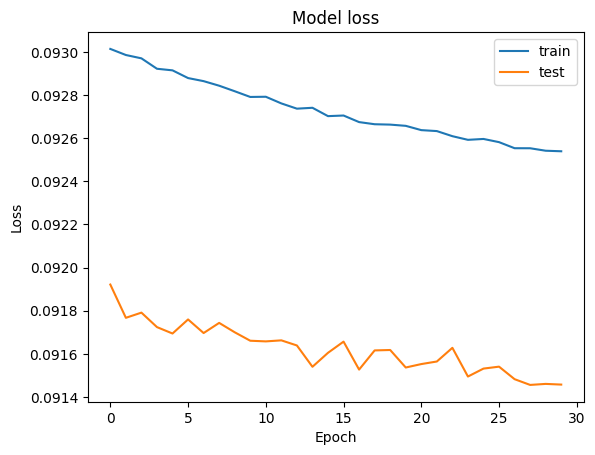

In [20]:
# Plot the loss
import matplotlib.pyplot as plt
history = autoencoder.history.history
plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='test')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [21]:
# Encode the noisy images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(10000, 784)
(10000, 32)


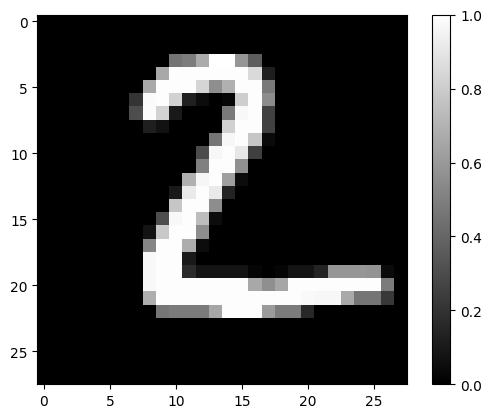

In [22]:
print(x_test.shape)
print(encoded_imgs.shape)

# Display a digit
def display_image(row):
    image = row.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.colorbar()
    plt.show()

display_image(x_test[1])

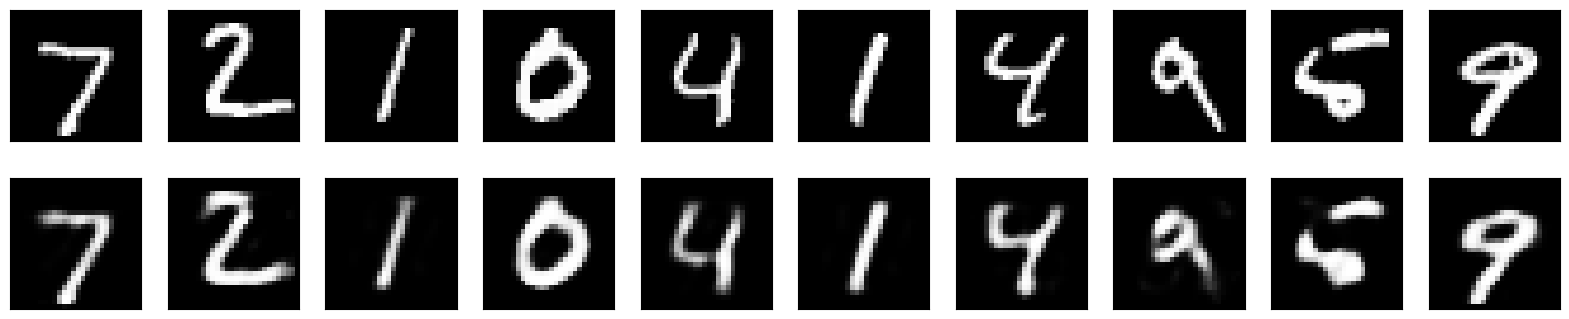

In [23]:
# Visualizing the digits
n = 10 # How many digits we will display
plt.figure(figsize=(20,4))
for i in range(n):
    # Display original
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [24]:
# Save the model
autoencoder.save('autoencoder_mnist.h5')

### Visualization

In [25]:
# t-SNE visualization
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

tsne_encoded = TSNE(n_components=2, random_state=0).fit_transform(encoded_imgs)

# Plot the t-SNE results
tsne_df = pd.DataFrame(tsne_encoded, columns=['x', 'y'])
tsne_df.shape

(10000, 2)

In [26]:
print(tsne_df.head(5))

           x          y
0 -25.714884 -47.163536
1   6.112726  14.023119
2 -30.196014  38.850780
3  74.122833  11.609267
4 -61.616524  -1.547642


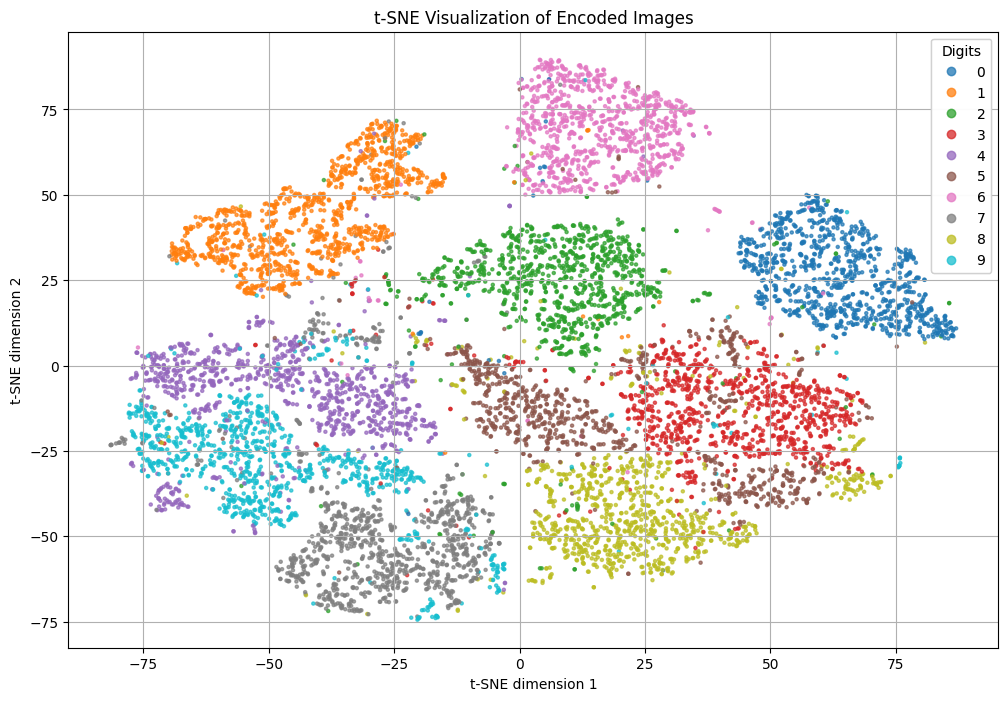

In [27]:
# 2. Plot the 2D t-SNE result
plt.figure(figsize=(12, 8))

# Color points by their digit label
scatter = plt.scatter(
    tsne_encoded[:, 0], tsne_encoded[:, 1], 
    c=y_test, cmap='tab10', s=5, alpha=0.7
)

# Add a legend for digits 0-9
legend = plt.legend(*scatter.legend_elements(), title="Digits")
plt.gca().add_artist(legend)

plt.title('t-SNE Visualization of Encoded Images')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.grid(True)
plt.show()
